In [1]:
#Loading libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from random import randrange, uniform
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from ggplot import *

C:\Users\npava\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
#Changing the directory
os.chdir("C:/Users/npava/Desktop/Bike Rental Project/python")

# Fetching Dataset For Analysis

In [29]:
bike_rental_data = pd.read_csv("day.csv")

print("Data read successfully")

Data read successfully


# Data Exploration

In [30]:
#About the features and target variables
features = bike_rental_data.columns[:-3]
target_var = bike_rental_data.columns[-1]
print("Features:\n",features)
print("Target Variable:\n",target_var)

Features:
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
Target Variable:
 cnt


In [31]:
#About the Dataset
print("Sample Dataset:")
print(bike_rental_data.head(5))

print("\nData statistics of each variable:")
bike_rental_data.describe()

Sample Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data stat

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Data Distribution

In [ ]:
#Histogram 
ggplot(bike_rental_data, aes(x = 'temp')) + geom_histogram(fill="DarkSlateBlue", colour = "black",bins = 25, binwidth = 0.1) +\
    geom_density() +\
    theme_bw() + xlab("Temp") + ylab("Range") + ggtitle("Normal Distribution of Temperature Variable")

In [ ]:
#Histogram 
ggplot(bike_rental_data, aes(x = 'atemp')) + geom_histogram(fill="DarkSlateBlue", colour = "black",binwidth = 0.08) +\
    geom_density() +\
    theme_bw() + xlab("Atemp") + ylab("Range") + ggtitle("Normal Distribution of Atemp Variable")

In [ ]:
#Histogram 
ggplot(bike_rental_data, aes(x = 'hum')) + geom_histogram(fill="DarkSlateBlue", colour = "black") +\
    geom_density() +\
    theme_bw() + xlab("hum") + ylab("Range") + ggtitle("Distribution of Humidity Variable")

In [ ]:
#Histogram 
ggplot(bike_rental_data, aes(x = 'windspeed')) + geom_histogram(fill="DarkSlateBlue", colour = "black") +\
    geom_density() +\
    theme_bw() + xlab("windspeed") + ylab("Range") + ggtitle("Distribution of windspeed Variable")

# Missing Value Analysis 

In [32]:
#Checking for any missing values in the dataset
print(bike_rental_data.isnull().any())

#As We can see from below table that there are no Missing Values in the dataset

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x231e8aaa5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x231e8aaae10>,
 'boxes': [<matplotlib.lines.Line2D at 0x231e8aaa080>],
 'medians': [<matplotlib.lines.Line2D at 0x231e8ab36a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x231e8ab3ac8>],
 'means': []}

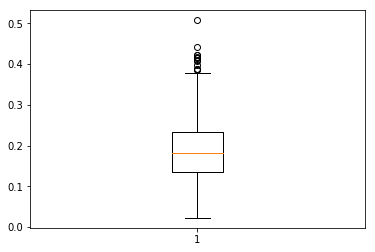

In [33]:
#Plotting the Outliers using the Box Plot
#Below are the outliers found in data set
%matplotlib inline
plt.boxplot(bike_rental_data['windspeed'])

#Negative Outliers found in windspeed attribute 

{'whiskers': [<matplotlib.lines.Line2D at 0x231e8b00748>,
 'caps': [<matplotlib.lines.Line2D at 0x231e8b00f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x231e8b00208>],
 'medians': [<matplotlib.lines.Line2D at 0x231e8b08828>],
 'fliers': [<matplotlib.lines.Line2D at 0x231e8b08c50>],
 'means': []}

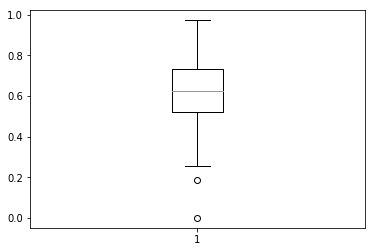

In [34]:
%matplotlib inline
plt.boxplot(bike_rental_data['hum'])

#Positive Outliers found in humidity attribute

In [35]:
numeric_features =  ["temp","atemp","hum","windspeed"]
outliers = ["windspeed","hum"]

In [36]:
# Detect and delete outliers from data
for i in outliers:
    print(i)
    q75, q25 = np.percentile(bike_rental_data[i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    bike_rental_data = bike_rental_data.drop(bike_rental_data[bike_rental_data.loc[:,i] < min].index) 
    bike_rental_data = bike_rental_data.drop(bike_rental_data[bike_rental_data.loc[:,i] > max].index)
    

windspeed
-0.012446750000000034
0.38061125
hum
0.21223837500000003
1.045157375


# Feature Selection

From the dataset we can drop instant variable as it doesn't provide much information for target variable
And also the year and month columns are already present so no need of dteday variable  

In [37]:
bike_rental_data = bike_rental_data.drop(['instant','dteday'], axis = 1)

Text(0,0.5,'Cnt')

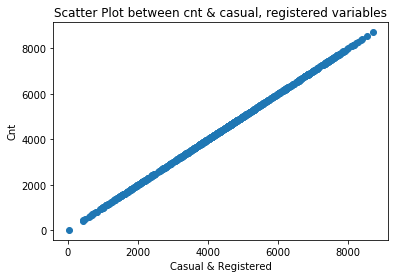

In [38]:
#Realtion between the cnt variables and casual & registered varibles
plt.scatter(x = bike_rental_data['casual']+bike_rental_data['registered'], y = bike_rental_data['cnt'])
plt.title("Scatter Plot between cnt & casual, registered variables")
plt.xlabel('Casual & Registered')
plt.ylabel('Cnt')

From the above scatter plot the casual & registered variables provide the same information as the cnt variable
So we can drop those two variables from the dataset

In [39]:
bike_rental_data = bike_rental_data.drop(['casual', 'registered'], axis = 1)

# Correlation Analysis

In [40]:
#Correlation Plot
corr_data = bike_rental_data.loc[:,numeric_features]

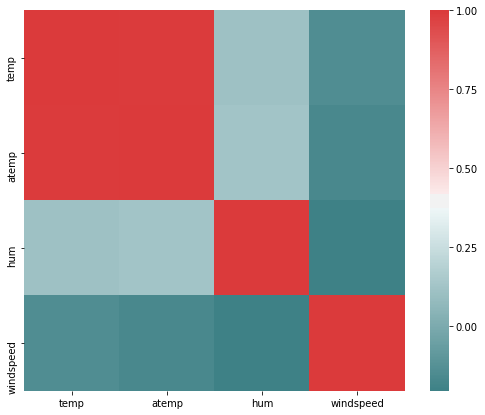

In [41]:
#Giving Dimensions for the correlation plot
f, ax = plt.subplots(figsize=(9, 7))

#Generating the correlation matrix
corr_matrix = corr_data.corr()

#Correlation plot using the sns library
sns.heatmap(corr_matrix, mask = np.zeros_like(corr_matrix, dtype= np.bool), cmap=sns.diverging_palette(200, 12, as_cmap= True),
            square = True, ax =ax)


From the above correlation plot we can say that temp and atemp attributes are highly related to each other.
So we can drop the atemp attribute.

In [42]:
bike_rental_data = bike_rental_data.drop(['atemp'], axis = 1)

In [43]:
bike_rental_data.shape

(717, 11)

# Model Deployment

In [44]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

In [45]:
def MAPE(y_actual, y_pred): 
    mape = np.mean(np.abs((y_actual - y_pred) / y_actual))*100
    return mape

In [46]:
#Divide data into train and test
X = bike_rental_data.values[:,0:10]
Y = bike_rental_data.values[:,10]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

# Random Forest

In [47]:
#MPAE = 15.47
#Accuracy = 84.53


In [47]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
RF_model.fit(X_train, y_train);

# Use the forest's predict method on the test data
predictions = RF_model.predict(X_test)

MAPE(y_test, predictions)


15.47769715067594

Text(0,0.5,'Predicted Values')

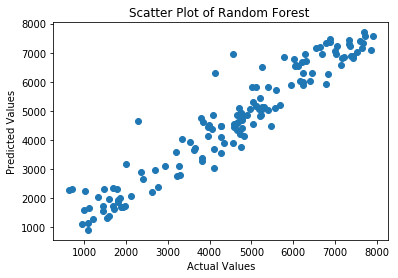

In [58]:
#Realtion between the cnt variables and casual & registered varibles
plt.scatter(x = y_test, y = predictions)
plt.title("Scatter Plot of Random Forest ")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# KNN Imputation Method

In [ ]:
#MPAE = 25.28
#Accuracy = 74.72


In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knnpredict = knn.predict(X_test)

In [76]:
MAPE(y_test, knnpredict)

25.281463823263188

Text(0,0.5,'Predicted Values')

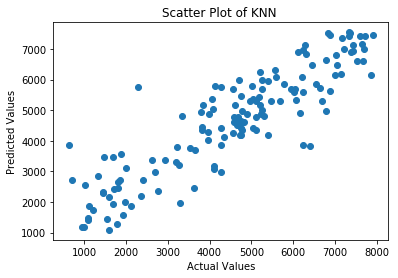

In [59]:
#Realtion between the cnt variables and casual & registered varibles
plt.scatter(x = y_test, y = knnpredict)
plt.title("Scatter Plot of KNN ")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Linear Regression

In [ ]:
#MPAE = 20.65
#Accuracy = 79.35

In [60]:
import statsmodels.api as sm

In [61]:
model = sm.OLS(y_train, X_train ).fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1556.
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:41:32   Log-Likelihood:                -4722.8
No. Observations:                 573   AIC:                             9466.
Df Residuals:                     563   BIC:                             9509.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           500.2386     65.343      7.656      0.000     371.893     628.584
x2          2138.9274     76.312     28.029      0.000    1989.036    2288.819
x3           -22.8436     20.691     -1.104      0.270     -63.485      17.798
x4          -454.4736    230.107     -1.975      0.049    -906.446      -2.501
x5           109.9554     18.971      5.796      0.000      72.693     147.218
x6           165.3474     84.431      1.958      0.051      -0.490     331.185
x7          -673.6286     97.197     -6.931      0.000    -864.542    -482.715
x8          5445.2941    227.896     23.894      0.000    4997.664    5892.924
x9           374.8002    320.024      1.171      0.242    -253.786    1003.386
x10         -570.1166    485.868     -1.173      0.241   -1524.452     384.219
==============================================================================
Omnibus:                       92.167   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.503
Skew:                          -0.863   Prob(JB):                     8.74e-46
Kurtosis:                       5.390   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
predictions_LR = model.predict(X_test) 

In [64]:
MAPE(y_test, predictions_LR)

20.652564037028018

Text(0,0.5,'Predicted Values')

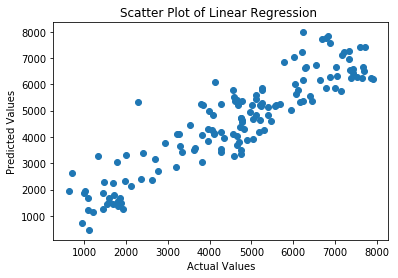

In [65]:
#Realtion between the cnt variables and casual & registered varibles
plt.scatter(x = y_test, y = predictions_LR)
plt.title("Scatter Plot of Linear Regression ")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
#Extra Graphs

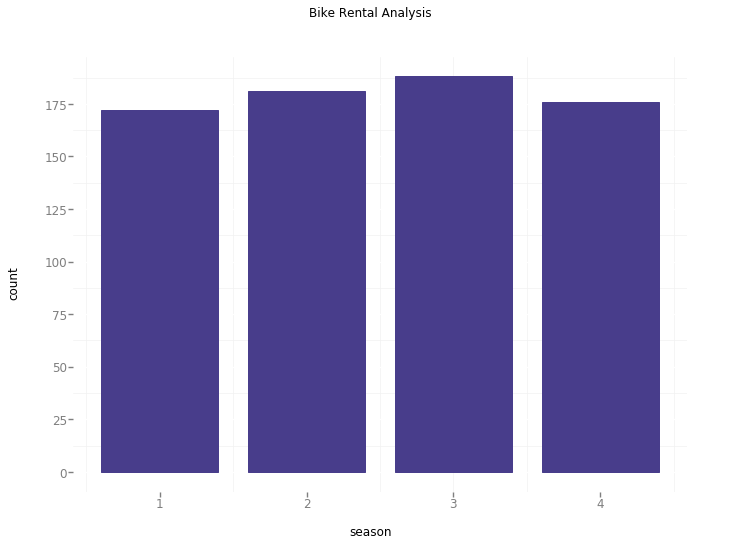

<ggplot: (150836426486)>

In [66]:
#bar plot
ggplot(bike_rental_data, aes(x='season', y='cnt')) +\
    geom_bar(fill= "DarkSlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("season") + ylab("count") + ggtitle("Bike Rental Analysis") + theme_bw()

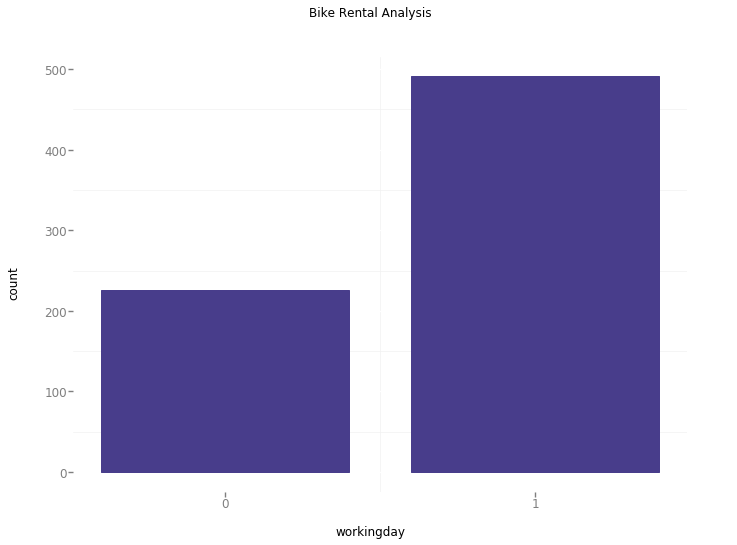

<ggplot: (-9223371886016147908)>

In [69]:
#bar plot
ggplot(bike_rental_data, aes(x='workingday', y='cnt')) +\
    geom_bar(fill= "DarkSlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("workingday") + ylab("count") + ggtitle("Bike Rental Analysis") + theme_bw()

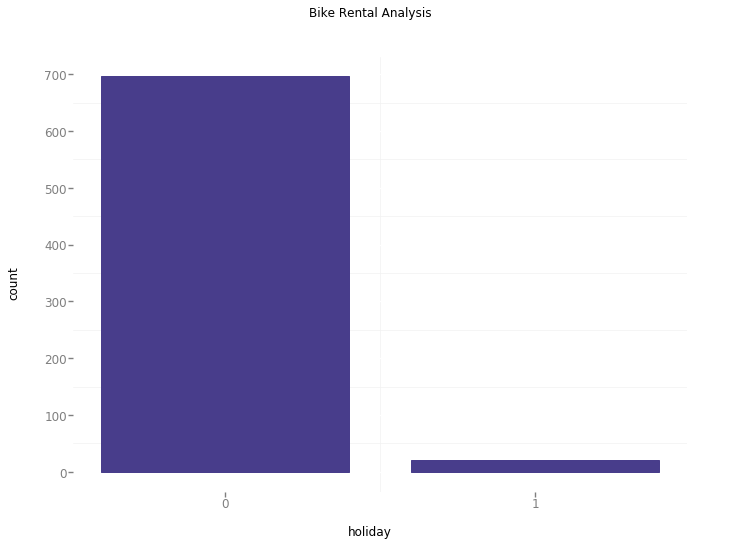

<ggplot: (150836426381)>

In [70]:
#bar plot
ggplot(bike_rental_data, aes(x='holiday', y='cnt')) +\
    geom_bar(fill= "DarkSlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("holiday") + ylab("count") + ggtitle("Bike Rental Analysis") + theme_bw()

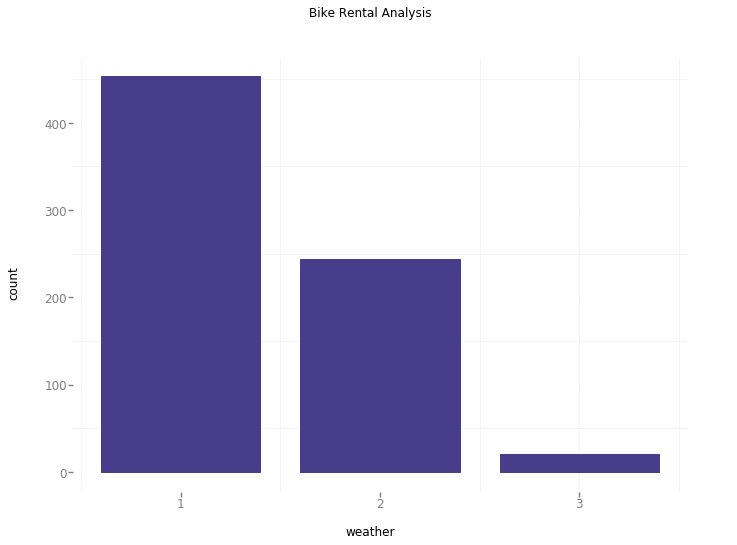

<ggplot: (150838720008)>

In [73]:
#bar plot
ggplot(bike_rental_data, aes(x='weathersit', y='cnt')) +\
    geom_bar(fill= "DarkSlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("weather") + ylab("count") + ggtitle("Bike Rental Analysis") + theme_bw()

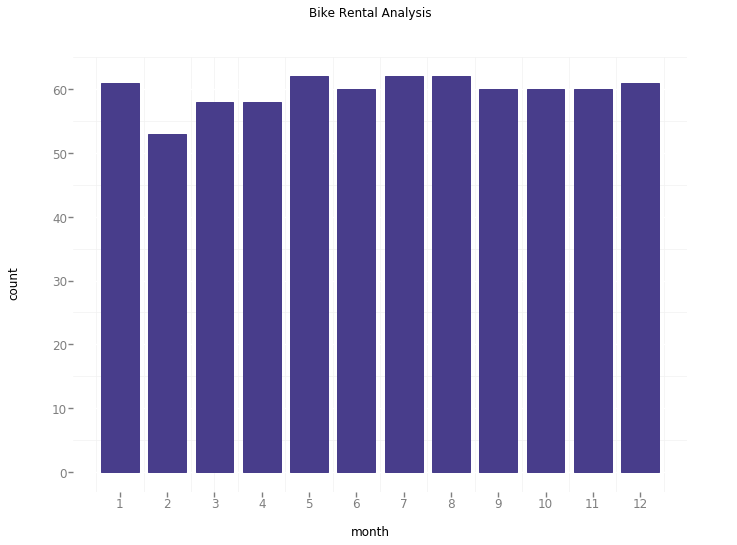

<ggplot: (-9223371886016055601)>

In [74]:
#bar plot
ggplot(bike_rental_data, aes(x='mnth', y='cnt')) +\
    geom_bar(fill= "DarkSlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("month") + ylab("count") + ggtitle("Bike Rental Analysis") + theme_bw()

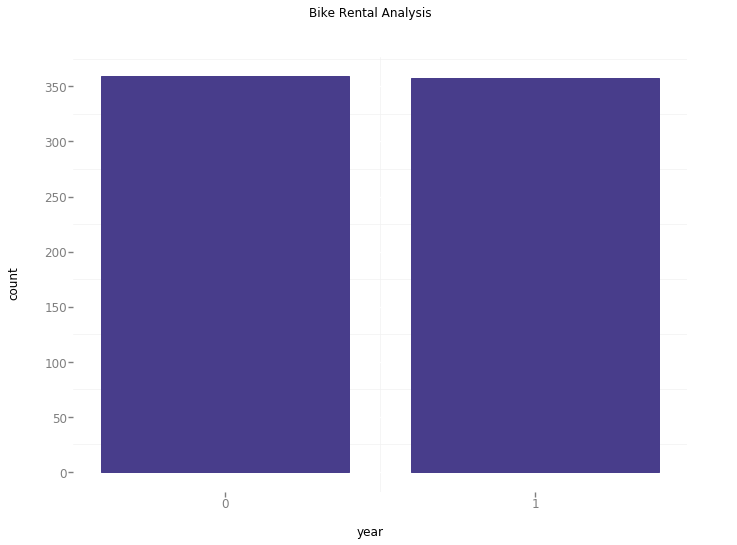

<ggplot: (-9223371886016001343)>

In [75]:
#bar plot
ggplot(bike_rental_data, aes(x='yr', y='cnt')) +\
    geom_bar(fill= "DarkSlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("year") + ylab("count") + ggtitle("Bike Rental Analysis") + theme_bw()